<a href="https://colab.research.google.com/github/Tianea2160/PythonPractice/blob/master/MakeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

In [ ]:
# 이미지 시각화를 위한 함수
def imshow(img):
    img = img /2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [ ]:
trans = transforms.Compose([transforms.Resize((32,32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/dataset/train", transform = trans)

In [ ]:
trainset.classes

['anger', 'anxiety', 'delight', 'hurt', 'neutrality', 'panic', 'sad']

In [ ]:
print(trainset.__getitem__(18))
print(len(trainset))

(tensor([[[ 0.0980,  0.1373,  0.1686,  ...,  0.4196,  0.3255,  0.2863],
         [ 0.1451,  0.1686,  0.2000,  ...,  0.4510,  0.3412,  0.3255],
         [ 0.1608,  0.1843,  0.2157,  ...,  0.4745,  0.3647,  0.3569],
         ...,
         [ 0.2314,  0.2706,  0.2078,  ..., -0.5294,  0.2784,  0.6392],
         [-0.0196, -0.2235, -0.5373,  ..., -0.8039, -0.5843,  0.1529],
         [ 0.3569, -0.1059, -0.7490,  ..., -0.8431, -0.7961, -0.6706]],

        [[-0.0431, -0.0118,  0.0275,  ...,  0.3020,  0.1608,  0.1216],
         [-0.0039,  0.0196,  0.0588,  ...,  0.3490,  0.1922,  0.1608],
         [ 0.0118,  0.0431,  0.0745,  ...,  0.3804,  0.2235,  0.2000],
         ...,
         [ 0.0980,  0.1373,  0.0902,  ..., -0.5608,  0.0588,  0.3255],
         [-0.2314, -0.3804, -0.5922,  ..., -0.7804, -0.6000, -0.0431],
         [ 0.1059, -0.2549, -0.7412,  ..., -0.8196, -0.7725, -0.6627]],

        [[-0.1608, -0.1294, -0.0980,  ...,  0.1843,  0.0431,  0.0118],
         [-0.1294, -0.1059, -0.0824,  ...,  

In [ ]:
trainloader = DataLoader(trainset,
                        batch_size = 16,
                        shuffle = False,
                        num_workers = 2)

In [ ]:
classes = trainset.classes


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


torch.Size([16, 3, 32, 32])
(3, 138, 138)
(138, 138, 3)
torch.Size([16, 3, 32, 32])
torch.Size([3, 70, 274])
anger anger anger anger anger anger anger anger anger anger anger anger anger anger anger anger 


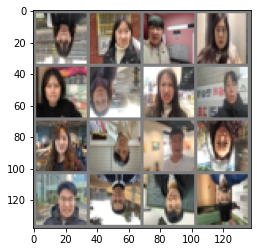

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [43]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
    net.cuda()

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')